In [1]:
from model.neb import *
from model.hindered_partition_function import *

/projects/westgroup/lekia.p/miniforge3/envs/pynta_fairchem/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
/projects/westgroup/lekia.p/miniforge3/envs/pynta_fairchem/lib/python3.9/site-packages/torchtnt/utils/version.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
/projects/westgroup/lekia.p/fairchem/src/fairchem/core/models/uma/escn_md.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mod

/projects/westgroup/lekia.p/fairchem/src/fairchem/core/models/uma/escn_md.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
/projects/westgroup/lekia.p/miniforge3/envs/pyn

Image 0: -206.427188 eV
Image 1: -206.426713 eV
Image 2: -206.426160 eV
Image 3: -206.425669 eV
Image 4: -206.425372 eV
Image 5: -206.425137 eV
Image 6: -206.424983 eV
Image 7: -206.424884 eV
Image 8: -206.424681 eV
Image 9: -206.419535 eV


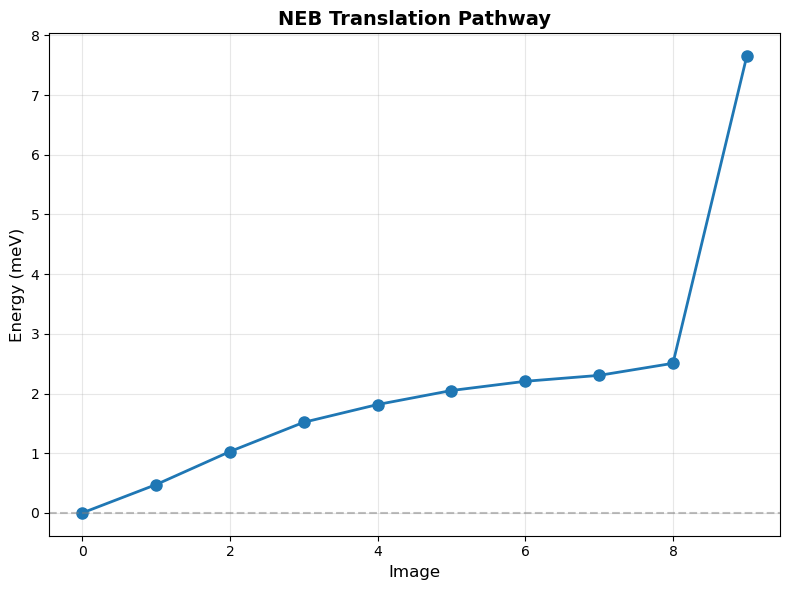


Barrier: 7.652 meV
Saddle point at image: 9
Reaction energy: 7.652 meV


array([-206.42718769, -206.42671276, -206.42615963, -206.42566944,
       -206.42537189, -206.42513729, -206.4249828 , -206.42488361,
       -206.42468143, -206.41953541])

In [2]:
traj_path = "/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Translation/neb_translation.traj"
plot_translation_neb(traj_path)

Image 0: -206.425448 eV
Image 1: -206.427296 eV
Image 2: -206.427176 eV
Image 3: -206.426780 eV
Image 4: -206.426684 eV
Image 5: -206.426533 eV
Image 6: -206.426530 eV
Image 7: -206.426680 eV
Image 8: -206.426869 eV
Image 9: -206.427285 eV
Image 10: -206.427354 eV
Image 11: -206.425448 eV


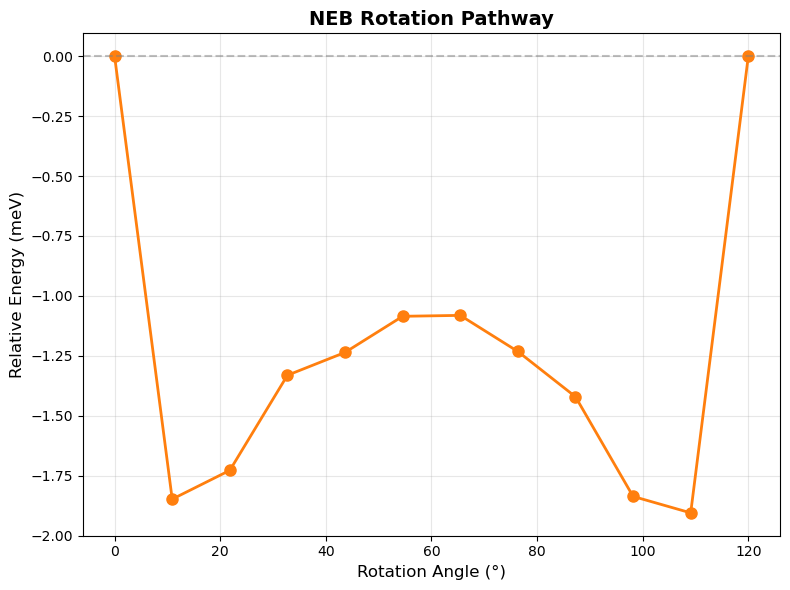


True rotational barrier: 0.824 meV
Minimum at image: 10 (109.1°)
Saddle at image: 6 (65.5°)


In [3]:
# Plot rotational energy path
traj_path = "/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Rotation/neb_rotation.traj"
angles, energies = plot_rotation_neb(traj_path)                                                                                                                                                                                                                         

In [5]:
screening_results = load_screening_results('/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/Screening_Data/screening_results.pkl')


 Screening results loaded successfully!
  File: /projects/westgroup/lekia.p/NEB/Adsorbates/NH3/Screening_Data/screening_results.pkl
  Total configurations: 2592
  Converged: 2592/2592
  Site types: bridge, fcc, hcp, ontop



In [7]:
mol = init_molecule('CH4')
ads = opt_molecule(init_molecule('CH4'))

Number of atoms: 5
Number of atoms: 5
      Step     Time          Energy          fmax
BFGS:    0 01:37:28      -23.986698        0.357848
BFGS:    1 01:37:28      -23.992255        0.186398
BFGS:    2 01:37:28      -23.994374        0.005201


In [8]:
from ase.io import read

min_constrained = min(screening_results, key=lambda x: x['adsorption_energy'])

# Load structure from file path
minimum_structure = read(min_constrained['structure_file'])

minimum_structure.calc = calc

print(f"Structure file: {min_constrained['structure_file']}")
print(f"Structure energy: {minimum_structure.get_potential_energy():.6f} eV")
print(f"Adsorption energy: {min_constrained['adsorption_energy']:.6f} eV")

n_structure_atoms = len(minimum_structure)
print(f"Total atoms: {n_structure_atoms}")

n_ads_atoms = len(ads)
print(f"Number of adsorbate atoms: {n_ads_atoms}")

n_surface_atoms = n_structure_atoms - n_ads_atoms
print(f"Number of surface/slab atoms: {n_surface_atoms}")
vibatoms = list(range(n_surface_atoms, n_structure_atoms))
print(f"Adsorbate index: {vibatoms}")

Structure file: /projects/westgroup/lekia.p/NEB/Adsorbates/NH3/Screening_Data/structures/ontop_h2.5_r210.xyz
Structure energy: -206.994027 eV
Adsorption energy: -0.598858 eV
Total atoms: 40
Number of adsorbate atoms: 5
Number of surface/slab atoms: 35
Adsorbate index: [35, 36, 37, 38, 39]


In [12]:
import json

neb_rot_summary = "/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Rotation/neb_summary.json"
with open(neb_rot_summary, 'r') as file:
    neb_rot = json.load(file)

neb_rot


{'barrier_type': 'rotation',
 'forward_barrier_fit': 1.9073486328125e-06,
 'delta_E': 1.9073486328125e-06,
 'transition_state_energy': -206.42544628104332,
 'trajectory': '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Rotation/neb_rotation.traj',
 'saddle_file': '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Rotation/saddle_rotation.traj',
 'saddle_index': 11,
 'n_images': 12}

In [13]:
neb_trans_summary = "/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Translation/neb_summary.json"
with open(neb_trans_summary, 'r') as file:
    neb_trans = json.load(file)

neb_trans

{'barrier_type': 'translation',
 'forward_barrier_fit': 0.0063419342041015625,
 'delta_E': 0.0063419342041015625,
 'transition_state_energy': -206.4195335002816,
 'trajectory': '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Translation/neb_translation.traj',
 'saddle_file': '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Translation/saddle_translation.traj',
 'saddle_index': 11,
 'n_images': 12}

In [24]:
screening_metadata = "/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/Screening_Data/screening_metadata_.json"
with open(screening_metadata, 'r') as file:
    screening_data = json.load(file)

M = screening_data[-1]['site_index']+1

In [17]:
lattice_constant = 4.012 # Angstrom
b = lattice_constant

In [25]:
W_x = neb_trans['forward_barrier_fit']
W_y = W_x
m = np.sum(ads.get_masses())
W_r = neb_rot['forward_barrier_fit']
T = 300 # K
n = 3 # number of equivalent minima in one full rotation (n=1 for heteronuclear diatomic molecules, n=2 for homonuclear diatomic molecules, n=3 for NH3, etc.)
symmetric_number=3
rotor_asymmetric=False

moi = get_moment_of_inertia_about_binding_atom(ads=ads)


trans = HinderedTranslationPartitionFunction(
    m,
    W_x,
    W_y,
    b,
    M,  # number of surface sites
    T  # temperature in K
)

rotor = HinderedRotorPartitionFunction(
        W_r,  # barrier height in eV
        n,  # number of equivalent minima
        moi,  # reduced moment of inertia in amu*Angstrom^2
        T,  # temperature in K
        symmetric_number,
        rotor_asymmetric
    )

translational_partition_function = trans.q_trans()
print(translational_partition_function)

rotor_partition_function = rotor.q_rot()
print(rotor_partition_function)


sitedensity = 8.79e+19

9349.117515258766
2.7898911457182547


In [27]:
from ase.io import read
import numpy as np
from fairchem.core.calculate import pretrained_mlip
from fairchem.core.calculate.ase_calculator import FAIRChemCalculator

def get_calc():
    """Create fresh FAIRChem calculator."""
    predictor = pretrained_mlip.get_predict_unit("uma-s-1", device="cpu")
    return FAIRChemCalculator(predictor, task_name="oc20")

def load_neb_with_energies(traj_path, n_images=12):
    """Load NEB trajectory and recalculate energies."""
    images = read(traj_path, index=f'-{n_images}:')
    calc = get_calc()
    
    energies = []
    for img in images:
        img.calc = calc
        energies.append(img.get_potential_energy())
    
    return images, np.array(energies)

# Load rotation NEB
rot_images, rot_energies = load_neb_with_energies(
    '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Rotation/neb_rotation.traj'
)
rot_barrier_energy = rot_energies.max() - rot_energies.min()

# Load translation NEB
trans_images, trans_energies = load_neb_with_energies(
    '/projects/westgroup/lekia.p/NEB/Adsorbates/NH3/NEB_Translation/neb_translation.traj'
)
trans_barrier_energy = trans_energies.max() - trans_energies.min()

# Minimum structure
minimum_structure = rot_images[0].copy()

# Verify
min_energy_rot = rot_energies.min()
min_energy_trans = trans_energies.min()

print(f"Rotation barrier: {rot_barrier_energy*1000:.3f} meV")
print(f"Translation barrier: {trans_barrier_energy*1000:.3f} meV")
print(f"\nMinimum energy (rotation NEB): {min_energy_rot:.6f} eV")
print(f"Minimum energy (translation NEB): {min_energy_trans:.6f} eV")
print(f"Difference: {abs(min_energy_rot - min_energy_trans)*1000:.3f} meV")

/projects/westgroup/lekia.p/fairchem/src/fairchem/core/models/uma/escn_md.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
/projects/westgroup/lekia.p/miniforge3/envs/pyn

Rotation barrier: 1.905 meV
Translation barrier: 7.940 meV

Minimum energy (rotation NEB): -206.427354 eV
Minimum energy (translation NEB): -206.427474 eV
Difference: 0.120 meV


In [29]:
from ase.vibrations import Vibrations

# Attach calculator to minimum structure
minimum_structure.calc = get_calc()

print(f"Vibrating atoms: {vibatoms}")
print(f"Adsorbate formula: {minimum_structure[vibatoms].get_chemical_formula()}")

# Run vibrations
vib = Vibrations(
    minimum_structure,
    indices=vibatoms,
    name='vib_NH3',
)
vib.run()
vib.summary()

# Get vibrational energies
vib_energies = vib.get_energies()
print(f"\nVibrational energies (meV): {vib_energies * 1000}")

Vibrating atoms: [35, 36, 37, 38, 39]
Adsorbate formula: H3NPt
---------------------
  #    meV     cm^-1
---------------------
  0    3.0i     24.5i
  1    2.0i     16.2i
  2    0.8i      6.8i
  3    4.0      32.6
  4    7.9      64.0
  5    9.7      77.9
  6   11.0      88.4
  7   11.0      89.1
  8   12.0      96.8
  9  122.2     986.0
 10  198.8    1603.7
 11  199.4    1607.9
 12  411.7    3320.8
 13  427.8    3450.2
 14  428.0    3451.7
---------------------
Zero-point energy: 0.922 eV

Vibrational energies (meV): [  0.        +3.04254847j   0.        +2.01363521j
   0.        +0.84385692j   4.03896979+0.j
   7.93128291+0.j           9.65255902+0.j
  10.95660423+0.j          11.04139446+0.j
  11.99702051+0.j         122.2491246 +0.j
 198.83663637+0.j         199.35528665+0.j
 411.73107948+0.j         427.76734381+0.j
 427.95070849+0.j        ]


In [30]:
from ase.thermochemistry import HinderedThermo

thermo = HinderedThermo(
    vib_energies=vib_energies,
    trans_barrier_energy=W_x,
    rot_barrier_energy=W_r,
    sitedensity=sitedensity,
    rotationalminima=n,
    symmetrynumber=symmetric_number,
    mass=m,
    inertia=moi,
)

In [36]:
table = create_janaf_table(thermo,SI_unit=False)
table.head()

,T (K),S (eV/K),U (eV),A (eV),Cv (eV/K),G (eV),H (eV),-(G-H(Tref))/T (eV/K),H-H(Tref) (eV)
0,50,0.001671,0.977974,0.894401,0.000350,0.894401,0.977974,0.003923,-0.112595
1,100,0.001987,0.998130,0.799399,0.000435,0.799399,0.998130,0.002912,-0.092439
2,150,0.002192,1.020504,0.691742,0.000456,0.691742,1.020504,0.002659,-0.070064
3,200,0.002341,1.043612,0.575381,0.000467,0.575381,1.043612,0.002576,-0.046957
4,250,0.002459,1.067248,0.452395,0.000478,0.452395,1.067248,0.002553,-0.023321


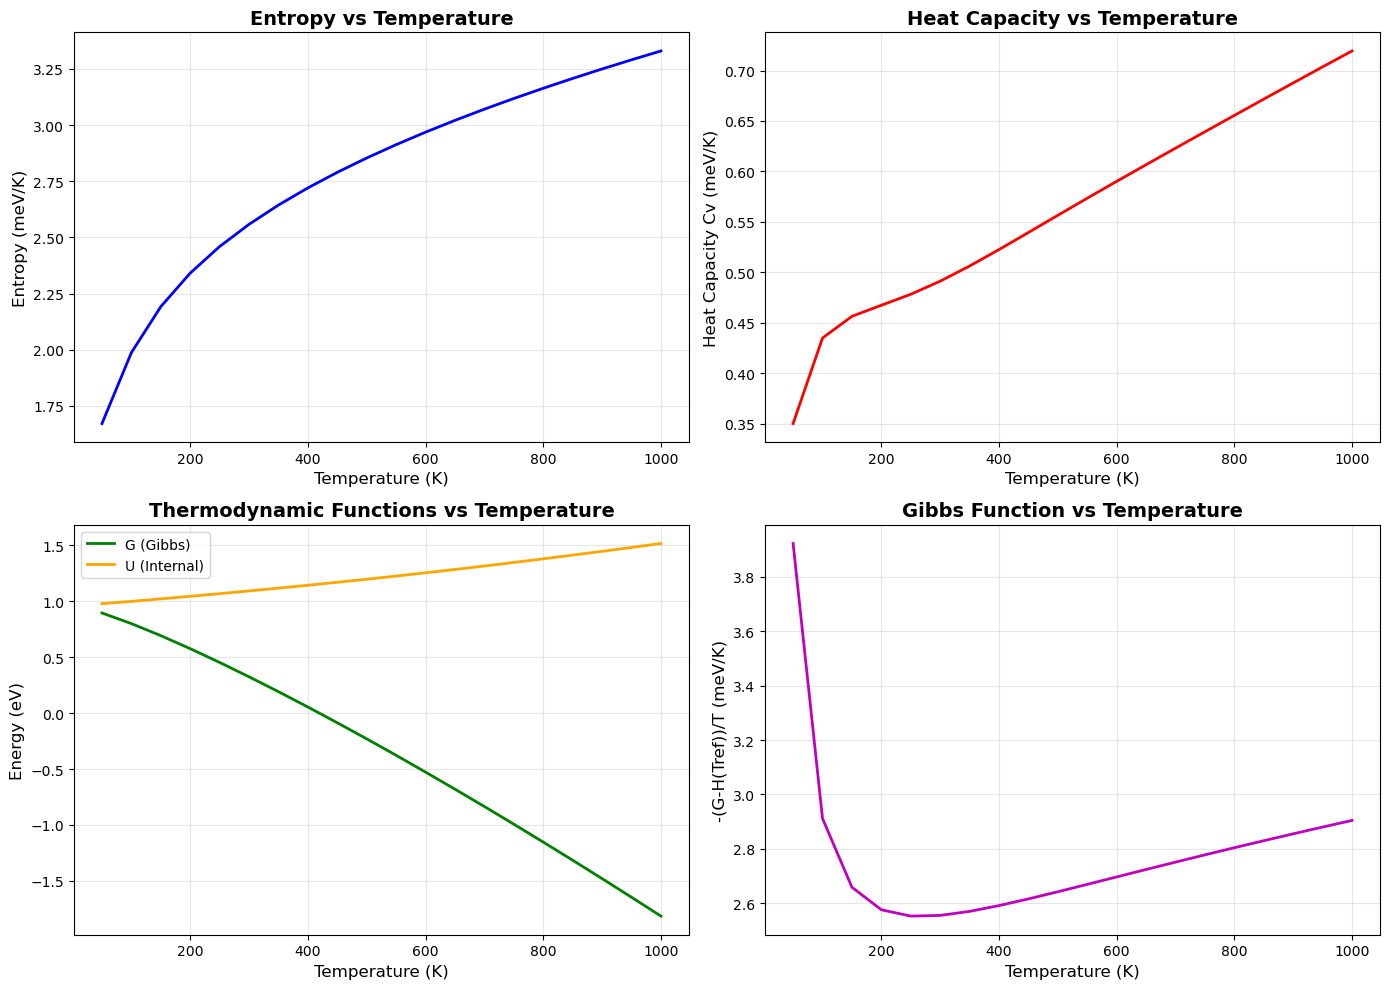

In [37]:
plot_thermochemistry(table, filename=None)